<a href="https://colab.research.google.com/github/ErandySV/Simulaci-n-I/blob/main/Integracion%20MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conocemos la idea central del método de monte carlo, si deseamos calcular la integral $I=\int_{a}^{b} g(x) dx$ para alcuna función $g(x)$ dificil de integrar analiticamente se realiza una sustitución:\\

$I=\int_{a}^{b} g(x) dx=\int_{a}^{b} w(x)f(x) dx$\\
con $w(x)=g(x)(b-a)$ y $f(x)=\frac{1}{b-a}$\\

La integral transformada se interpreta como el múltiplo del valor esperado de $g(x)$ bajo la siguiente distribución uniforme:\\

$E(g(x))=\frac{I}{b-a}$ con $X~U(a,b)$\\


Se toma una muestra uniforme, por ejemplo:\\

digamos $X_1,... X_N~ U(a.b)$ por la ley de los grandes números, para un N suficientemente grande se interpreta la probabilidad \\
$\frac{1}{N} ∑_{i=1}^{N} g(x_i) \rightarrow E(g(x))=\frac{I}{b-a} $

Retomando el ejercicio dejado \\
$\int_{0}^{1} (\sqrt{arctan(x)})dx$ \\

La $I=\int_{a}^{b} g(x) dx=\int_{a}^{b} w(x)f(x) dx$\\

Quedaría como $I=\frac{1}{N} { g(u_i)+...+g(b_n)} dx$\\

Calculamos g(u_i) tomando valores pseudoaleatorios

Se tiene luego $\;\;E(g(x))=\frac{I}{b-a} \hspace{5mm} ⇒ \hspace{5mm} I=(b-a)E(g(x))$  

Por lo tanto, se tiene el estimador insesgado $\theta_1=(b-a)\frac{1}{n}\sum_{i=1}^ng(x)\approx(b-a)E(g(x))= I$



In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def g(x):       #Esta función calcula las funciones gi(x) y las guarad en una lista
  g_i=np.sqrt(np.arctan(x))
  return g_i

In [3]:
def exp(n,a,b):
  Ui=np.random.uniform(0, 1, n)       #Genera n variables ~ U(0,1)
  Xi=a+Ui*(b-a)                       #Calcula lista de Xi
  g_i=g(Xi)                           #Calcula lista de g(Xi)
  I=(b-a)/n*np.sum(g_i)               #Calcula aproximación

  return I

In [15]:
def histograma(aprox):                                  #Esta función imprime la estimación y el histograma
  plt.hist(aprox, bins=25, color='blue', alpha=0.7)
  #media
  plt.axvline(np.mean(aprox))
  #Intervalo de confianza
  plt.axvline(np.mean(aprox)-np.std(aprox), color='green')
  plt.axvline(np.mean(aprox)+np.std(aprox), color='green')
  plt.legend()

  return

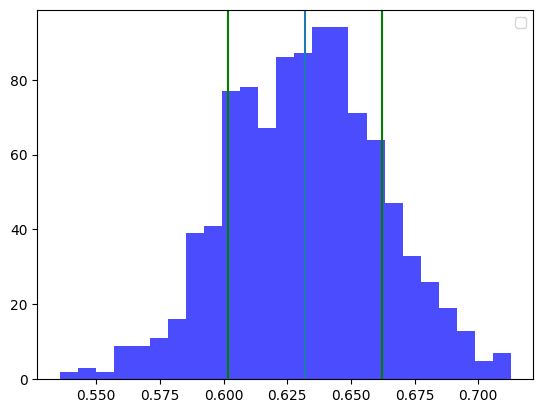

In [16]:
#Simulacion

#Parametros
m=1000        #Número de iteraciones
n=50           #Tamaño de la experimentos
a=0             #Límite inferior de la integral
b=1             #Límite superior de la integral

aprox=[]
for i in range(m):
  aprox.append(exp(n,a,b))

histograma(aprox)

Por el método de acierto y error evaluaremos esta misma integral para poder comparar ambos métodos

In [9]:
 #Declaramos una función  función calcular los  gi(x_i)
 def g(x):
  g_i=np.sqrt(np.arctan(x)) #Función a evaluar
  return g_i

Declaramos la función que realizara la "selección"

In [19]:
def aceptacion_rechazo(n,Ui,g_i,a,b,c):
  aciertos=0
  for i in range(n):
     #Aplicamos condiciones de aceptación yy rechazo
    if c*Ui[i-1] < g_i[i-1]:
      aciertos+=1
       #Calculamos  la estimación
  I=c*(b-a)*aciertos/n

  return I

In [20]:
def exp(n,a,b,c):
  #Generamos los números aleatorios
  Ui1=np.random.uniform(0, 1, n)
  Ui2=np.random.uniform(0, 1, n)

  Xi=a+Ui1*(b-a)
  g_i=g(Xi)

  I=aceptacion_rechazo(n,Ui2,g_i,a,b,c)

  return I

Realizamos el histograma para la mejor observación de ambos métodos

In [21]:
def histograma(aprox):
  plt.hist(aprox, bins=25, color='green', alpha=0.7)
  #Media
  plt.axvline(np.mean(aprox))

  plt.legend()
  print('Estimación: ', np.mean(aprox))
  return

Realizamos el experimento con los mismos valores que en el método anterior

Estimación:  0.6293097397640033


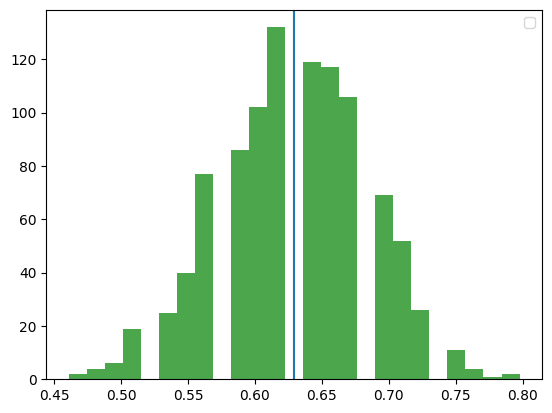

In [22]:
m=1000                          #Número de iteraciones
n=50                            #Tamaño de la experimentos
#Límites de la integral
a=0
b=1
c=np.sqrt(np.arctan(1))
aprox=[]

for i in range(m):
  aprox.append(exp(n,a,b,c))

histograma(aprox)

En resumen, el método de la media muestral es preferible al método de "acierto y error" para la aproximación numérica de integrales, incluyendo la integral evaluada  debido a su mayor rigor matemático, control de precisión y capacidad para manejar funciones complejas.

El método de la media muestral es más riguroso y sistemático que el método de "acierto y error".\\

 Proporciona una estimación cuantitativa más precisa y controlada del valor de la integral.

Es particularmente útil cuando se desea una aproximación numérica precisa y se dispone de recursos computacionales para generar un número suficiente de muestras aleatorias.